## Installation Considerations

Installing Python and the suite of libraries that enable scientific computing is straightforward . This section will outline some of the considerations when setting up your computer.

Though there are various ways to install Python, the one I would suggest for use in data science is the Anaconda distribution, which works similarly whether you use Windows, Linux, or Mac OS X.
The Anaconda distribution comes in two flavors:

- [Miniconda](http://conda.pydata.org/miniconda.html) gives you the Python interpreter itself, along with a command-line tool called ``conda`` which operates as a cross-platform package manager geared toward Python packages, similar in spirit to the apt or yum tools that Linux users might be familiar with.

- [Anaconda](https://www.continuum.io/downloads) includes both Python and conda, and additionally bundles a suite of other pre-installed packages geared toward scientific computing. Because of the size of this bundle, expect the installation to consume several gigabytes of disk space.

Any of the packages included with Anaconda can also be installed manually on top of Miniconda; for this reason I suggest starting with Miniconda.

To get started, download and install the Miniconda package–make sure to choose a version with Python 3–and then install the core packages used in this book:

```
[~]$ conda install numpy pandas scikit-learn matplotlib seaborn jupyter
```

Throughout the text, we will also make use of other more specialized tools in Python's scientific ecosystem; installation is usually as easy as typing **``conda install packagename``**.
For more information on conda, including information about creating and using conda environments (which I would *highly* recommend), refer to [conda's online documentation](http://conda.pydata.org/docs/).ipynb_checkpoints/

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import matplotlib
from matplotlib import rc

import seaborn as sns
sns.set()

%matplotlib inline

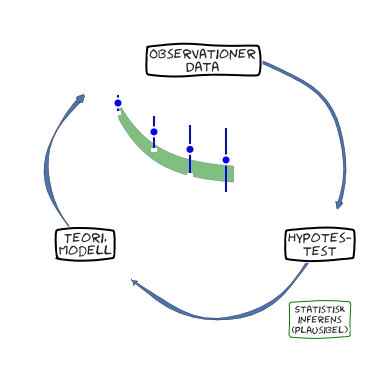

In [2]:
from matplotlib.patches import Circle, Wedge, Polygon,Ellipse, Arc
from matplotlib.collections import PatchCollection

lfont = 14
mfont = 10
# XKCD style
plt.xkcd()

fig = plt.figure(1, figsize=(6,6))
ax = plt.gca()
#ax.grid()
plt.axis('off')

mainbox = dict(boxstyle="round4", fc="w", lw=2)

ax.annotate("Observationer\nData",
            xy=(0.9, 0.4), xycoords='data',
            xytext=(0.5, 0.85), textcoords='data',
            size=lfont, va="center", ha="center",
            bbox=mainbox, zorder=200,
            arrowprops=dict(arrowstyle="simple",
                            connectionstyle="arc3,rad=-0.5",
                            relpos=(1,0.5)) 
            )

ax.annotate("Hypotes-\ntest",
            xy=(0.18, 0.25), xycoords='data',
            xytext=(0.85, 0.3), textcoords='data',
            size=lfont, va="center", ha="center",
            bbox=mainbox, zorder=200)

ax.annotate("",
            xy=(0.28, 0.2), xycoords='data',
            xytext=(0.85, 0.3), textcoords='data',
            size=lfont, va="center", ha="center",
            bbox=mainbox,
            arrowprops=dict(arrowstyle="simple",
                            connectionstyle="arc3,rad=-0.6")
            )
ax.annotate(u"Teori,\nModell",
            xy=(0.26, 0.84), xycoords='data',
            xytext=(0.15, 0.3), textcoords='data',
            size=lfont, va="center", ha="center",
            bbox=mainbox,zorder=200)

ax.annotate("",
            xy=(0.15, 0.75), xycoords='data',
            xytext=(0.15, 0.3), textcoords='data',
            size=lfont, va="center", ha="center",
            bbox=mainbox,
            arrowprops=dict(arrowstyle="simple",
                            connectionstyle="arc3,rad=-0.52")
            )


# Sample data and theory with errors

ax_inset = fig.add_axes([0.3,0.44,0.3,0.3], frameon=False, axisbg='w')

# example data
x = np.arange(0.1, 2, 0.5)
x_th = np.linspace(0.1,1.7,100)
y = np.exp(-x)
# example error bar values that vary with x-position
error = 0.1 + 0.2 * x
# error bar values w/ different -/+ errors
lower_error = 0.4 * error
upper_error = error
asymmetric_error = [lower_error, upper_error]
y_th = np.exp(-2.*x_th)
y_th_lo = y_th-0.1
y_th_hi = y_th+0.1

ax_inset.fill_between(x_th,y_th_lo,y_th_hi, alpha=0.5,
                      facecolor='green', interpolate=True)
ax_inset.errorbar(x, y, yerr=error, fmt='o')


ax_inset.get_xaxis().set_visible(False)
ax_inset.get_yaxis().set_visible(False)

props = dict(boxstyle='round', edgecolor='green', facecolor='white',lw=1)

textstr = 'Statistisk\ninferens\n(plausibel)'
ax.text(0.85, 0.12, textstr, transform=ax.transAxes, fontsize=mfont,
        va='top', ha='center', zorder=100, bbox=props)

plt.savefig('figures/scientific_wheel.png',bbox_inches='tight',transparent=True, pad_inches=0,edgecolor='none')